In [31]:
import json
from matplotlib import pyplot as plt
import numpy as np

In [32]:
venues = json.load(open('../data/bow/venues.json'))
referees = json.load(open('../data/bow/referees.json'))
advisors = json.load(open('../data/bow/advisors.json'))

In [33]:
all = {'venues': venues, 'referees': referees, 'advisors': advisors}

In [34]:
def get_counts(data):
  """ Count array lengths present in the values of the given dict.
  Average the lengths of the constituent vectors of each venue,
  advisor or referee. """
  counts = [0 for _ in list(range(10))]
  for arr in data.values():
    if len(arr) > len(counts)-1:
      counts[-1] += 1
    else:
      counts[len(arr)] += 1
  return counts

In [35]:
for key in all:
  print(key, get_counts(all[key]))


venues [6, 6, 22, 22, 27, 35, 37, 37, 31, 4030]
referees [13, 13, 54, 150, 199, 322, 322, 355, 269, 8500]
advisors [0, 0, 0, 0, 1, 0, 1, 1, 0, 1090]


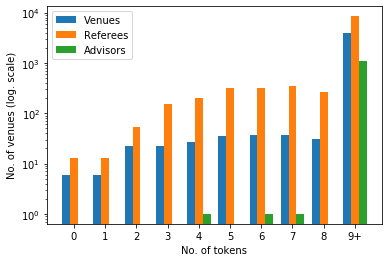

In [37]:
x = np.arange(0, 30, 3)
ticks = [str(i) for i in range(10)]
ticks[-1] += '+'
width = .75
plt.bar(x-1, get_counts(venues), width, label='Venues')
plt.bar(x-.25, get_counts(referees), width, label='Referees')
plt.bar(x+.5, get_counts(advisors), width, label='Advisors')
plt.yscale('log')
plt.xticks(x-.25, ticks)
plt.xlabel('No. of tokens')
plt.ylabel('No. of venues (log. scale)')
plt.legend()
plt.show()

In [41]:
avg_lens = {key: sum([len(v) for v in value]) / len(value) for key, value in all.items()}
avg_lens

{'venues': 36.26663531624735,
 'referees': 19.43954104148279,
 'advisors': 15.824336688014638}